In [1]:
import os
import glob
import datetime
import numpy as np
from astropy.io import fits
from photutils import DAOStarFinder, CircularAperture
import photutils.psf
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import peak_widths
import astropy.units as u
import pandas as pd

from calibFuncs import * #sortData, starLocate, nircEPSF, calcBinDist

In [2]:
datadir = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium'
NIRC2_datasets = sortData(datadir, instrument='NIRC2', filesufx='*.fit*')

In [3]:
len(NIRC2_datasets)

16

In [ ]:
uniques = sortData(datadir, instrument='NIRC2', filesufx='*.fit*', returntab=True)

In [7]:
stacktest = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\nirc2-trapezium\\stacked\\theta1ori b_2001-12-20_NIRCshiftmed.fits'

In [37]:
len(NIRC2_datasets[15])

25

In [41]:
NIRC2_datasets[15][0]

'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\\William\\trapezium_data\\nirc2-trapezium\\20200103\\n0201_distorcorr.fits.gz'

Choose a reference star image to create a reference PSF from


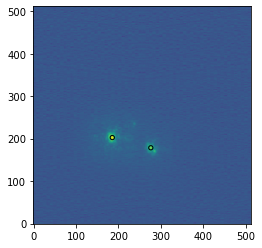

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
276.13759543331224 178.53519988494907 0.022323179015290115
185.45151782742053 202.58157081936005  0.06508536516122208
input the 0 indexed integer of your target from the table above: 1
target star is at  185 , 202  at FWHM 4.938264583578842


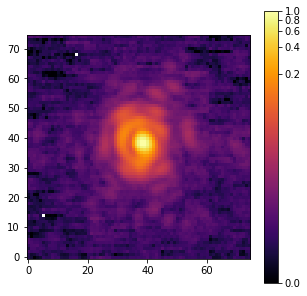

Select your target system to fit positions to


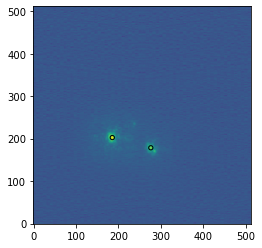

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
276.13759543331224 178.53519988494907 0.022323179015290115
185.45151782742053 202.58157081936005  0.06508536516122208
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.985169357784116
113.91058034067417 mas +/- 0.02949956771161195 mas
229.86179365932674 +/- 0.7311157299336912
Choose a reference star image to create a reference PSF from


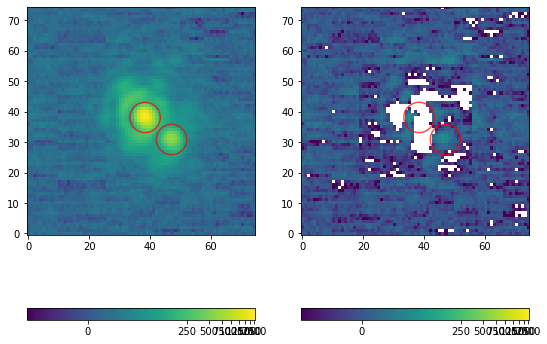

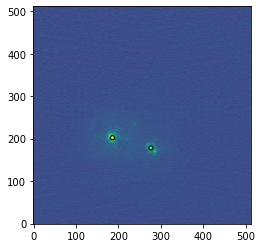

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
276.4524794916946  178.2658776033969 0.12139630067917037
185.9184487209019 202.23391971271977 0.09814029871397839
input the 0 indexed integer of your target from the table above: 1
target star is at  185 , 202  at FWHM 4.786408886332424


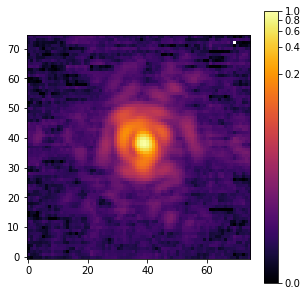

Select your target system to fit positions to


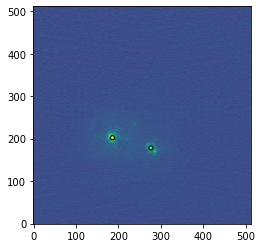

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
276.4524794916946  178.2658776033969 0.12139630067917037
185.9184487209019 202.23391971271977 0.09814029871397839
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 4.880739983880062
113.76825891738713 mas +/- 0.03242715392483256 mas
229.91356129831922 +/- 0.7249069816841711
Choose a reference star image to create a reference PSF from


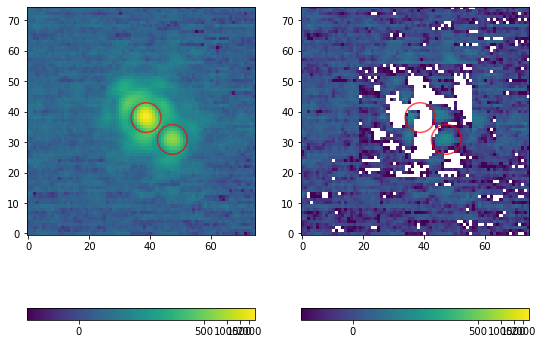

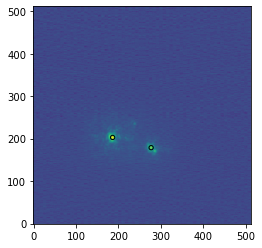

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 276.8823263892623 178.79271848734868 0.051552800572757934
186.21752959273743   202.862185202498  0.03721780736721837
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.923486240841953


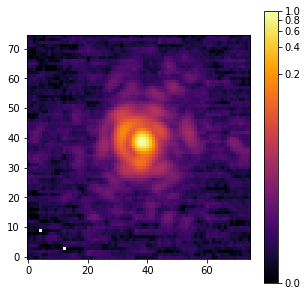

Select your target system to fit positions to


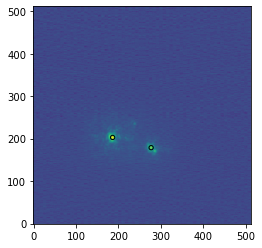

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 276.8823263892623 178.79271848734868 0.051552800572757934
186.21752959273743   202.862185202498  0.03721780736721837
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 5.064380254515868
113.71683528810877 mas +/- 0.03441873385407565 mas
229.7976447572213 +/- 0.6448227225167784
Choose a reference star image to create a reference PSF from


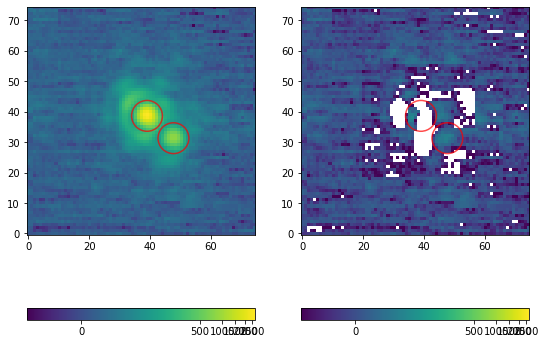

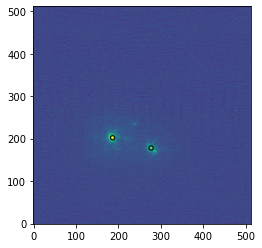

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
276.88158082753284 178.14821006469433 0.08077208175332339
186.19923969896598  202.1967091982568 0.09028438165710595
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.916996271288156


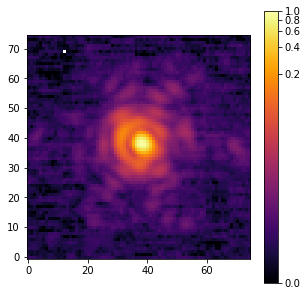

Select your target system to fit positions to


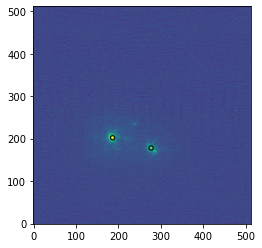

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
276.88158082753284 178.14821006469433 0.08077208175332339
186.19923969896598  202.1967091982568 0.09028438165710595
input the 0 indexed integer of your target from the table above: 0
target star is at  276 , 178  at FWHM 5.064403374654603
113.80646328642142 mas +/- 0.027773976355034907 mas
229.92726815469467 +/- 0.6423666186786647
Choose a reference star image to create a reference PSF from


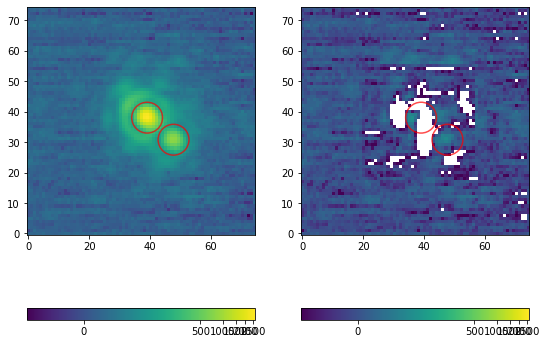

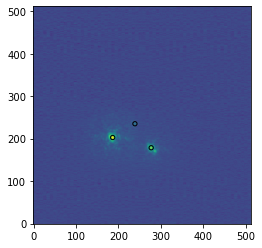

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
277.00201634299697 178.60217121511548  0.0526870418005234
186.35928917999232 202.70091973936707 0.02978022168011172
238.74783692670647 235.11820781236426 0.03253023526871742
input the 0 indexed integer of your target from the table above: 1
target star is at  186 , 202  at FWHM 4.855071469431806


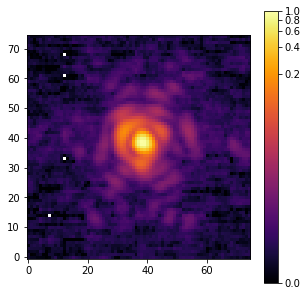

Select your target system to fit positions to


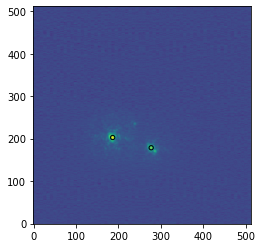

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
277.00201634299697 178.60217121511548  0.0526870418005234
186.35928917999232 202.70091973936707 0.02978022168011172
input the 0 indexed integer of your target from the table above: 0
target star is at  277 , 178  at FWHM 4.930814900997007
114.0455802271618 mas +/- 0.0620419922910052 mas
229.88135978004948 +/- 0.5816554946450196
Choose a reference star image to create a reference PSF from


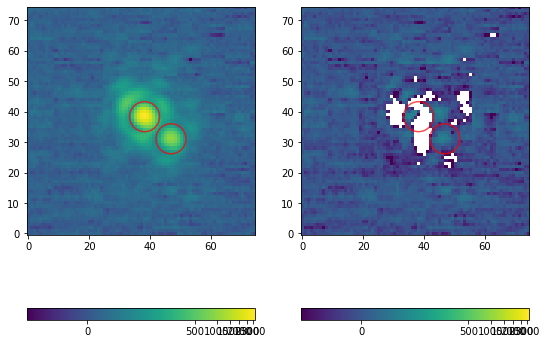

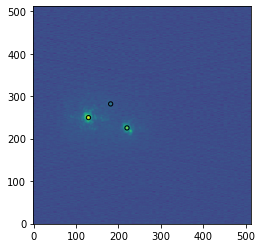

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.07038200701663  225.3093015158884 0.06773394667837812
129.36193274076174   249.557506297095 0.06468721582116906
181.57151113612989 281.76803087214347 0.04921401246571138
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.754121311501649


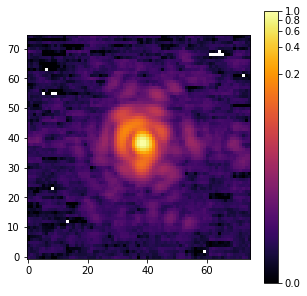

Select your target system to fit positions to


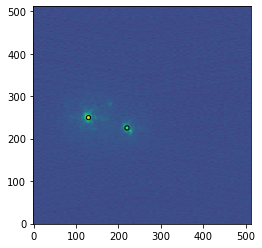

    xcentroid          ycentroid          roundness     
------------------ ----------------- -------------------
220.07038200701663 225.3093015158884 0.06773394667837812
129.36193274076174  249.557506297095 0.06468721582116906
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.824097670758164
113.8507500253535 mas +/- 0.08516201203007591 mas
229.95102968764814 +/- 0.5678033460502263
Choose a reference star image to create a reference PSF from


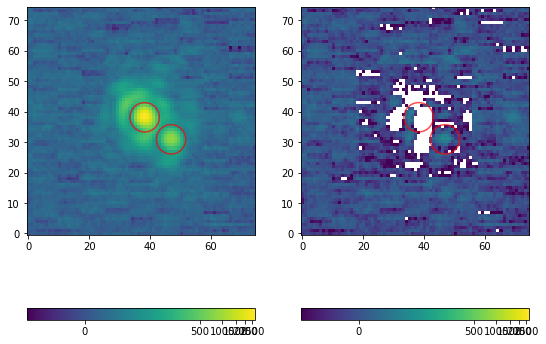

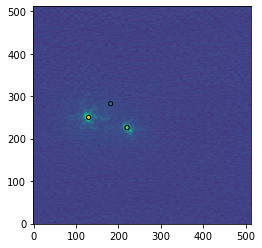

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 220.2029857926922 225.96873436663145  0.05578472838115521
129.70736952546252  249.9742723720296  0.06959102847420039
181.70393638787164  282.3496319140897 0.041936889861087887
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.901886791767581


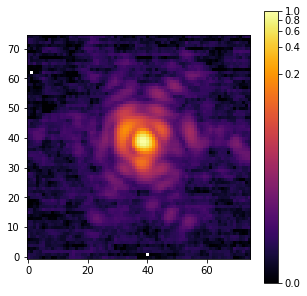

Select your target system to fit positions to


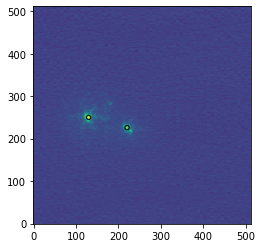

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 220.2029857926922 225.96873436663145 0.05578472838115521
129.70736952546252  249.9742723720296 0.06959102847420039
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.970092314631074
113.70081377674427 mas +/- 0.1040192415808534 mas
229.99406561036295 +/- 0.5329136492564146
Choose a reference star image to create a reference PSF from


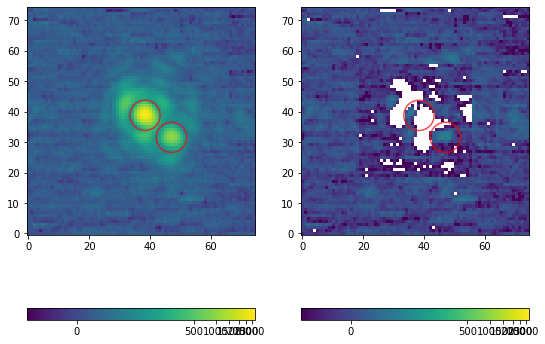

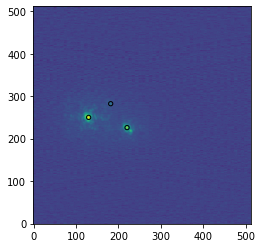

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
220.19995004832475 225.99057338056807  0.05456569882977382
129.74154499317044  250.0038743946394  0.06288338140048921
 181.6629606540198 282.26858204979555 0.032765136823047325
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 250  at FWHM 4.875320814386868


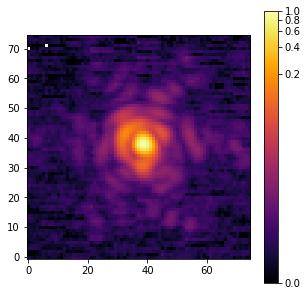

Select your target system to fit positions to


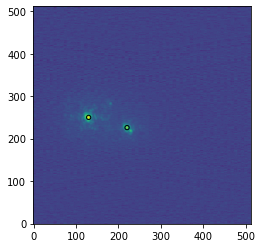

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.19995004832475 225.99057338056807 0.05456569882977382
129.74154499317044  250.0038743946394 0.06288338140048921
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.9863192652167925
113.9089570268925 mas +/- 0.09362050100631815 mas
229.90816549364956 +/- 0.5578372878388791
Choose a reference star image to create a reference PSF from


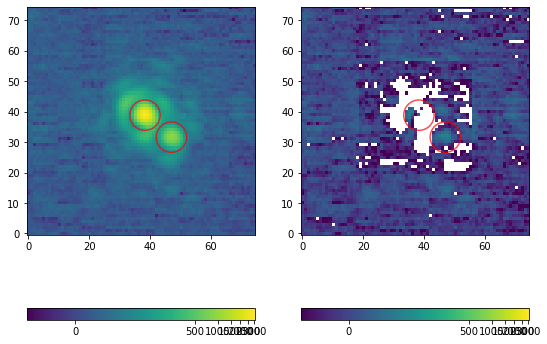

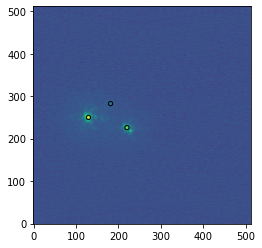

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.00996234761925 225.92127286920498 0.04876715139048953
129.37469863013578 249.97877618452895  0.0527137564702721
181.39358088012236 282.49716651063613 0.07755246530535767
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.925738139034095


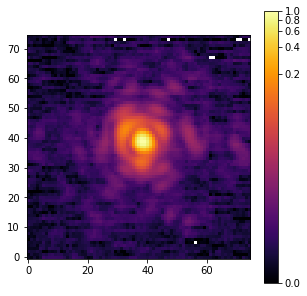

Select your target system to fit positions to


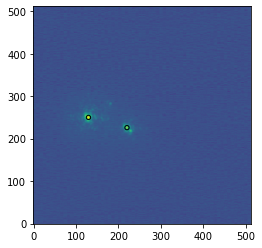

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.00996234761925 225.92127286920498 0.04876715139048953
129.37469863013578 249.97877618452895  0.0527137564702721
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.978050041412416
113.90971048983425 mas +/- 0.09655328902618406 mas
229.9870347603104 +/- 0.5474516593774297
Choose a reference star image to create a reference PSF from


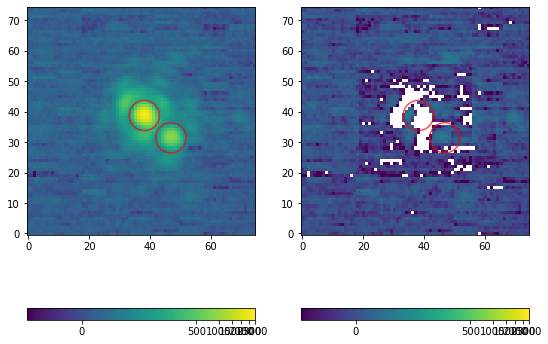

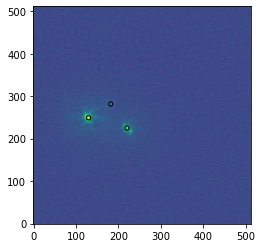

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.15952450798952 225.11156481604468 0.07790843037671785
129.65466499475033 249.11768961951935   0.071701641371623
181.60899256184243 281.63909660168264   0.094693329877569
input the 0 indexed integer of your target from the table above: 1
target star is at  129 , 249  at FWHM 4.82384030498315


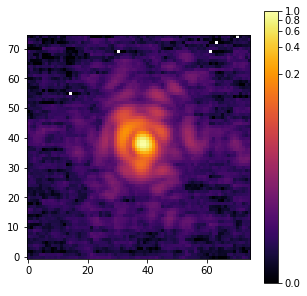

Select your target system to fit positions to


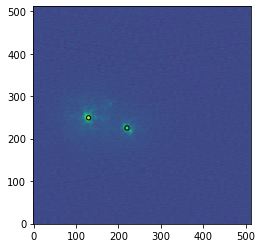

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
220.15952450798952 225.11156481604468 0.07790843037671785
129.65466499475033 249.11768961951935   0.071701641371623
input the 0 indexed integer of your target from the table above: 0
target star is at  220 , 225  at FWHM 4.843658218533392
113.90734928885597 mas +/- 0.053577813491868354 mas
229.9906688481599 +/- 0.5884566156535413
Choose a reference star image to create a reference PSF from


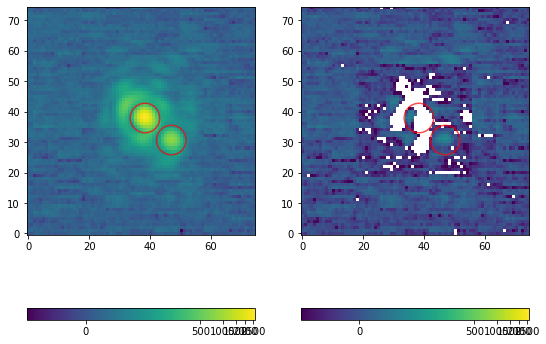

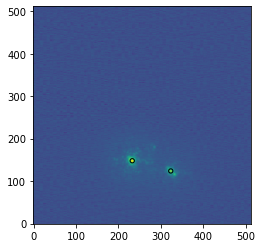

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.10299452318617 123.92210549179501 0.06901533637471205
 232.4591316785509 147.96583967838487 0.06615017069360536
input the 0 indexed integer of your target from the table above: 1
target star is at  232 , 147  at FWHM 5.0406249456459875


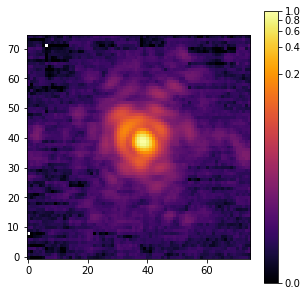

Select your target system to fit positions to


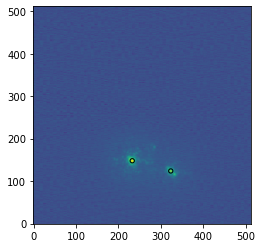

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.10299452318617 123.92210549179501 0.06901533637471205
 232.4591316785509 147.96583967838487 0.06615017069360536
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 123  at FWHM 5.157579598194388
113.33716468510931 mas +/- 0.0337193070191789 mas
229.8951574973783 +/- 0.6353332293818141
Choose a reference star image to create a reference PSF from


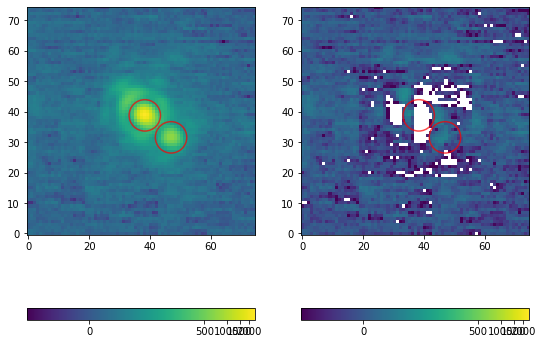

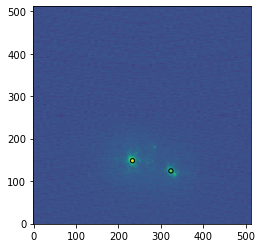

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 323.4704909394344 124.12764692496921  0.1022598637756013
232.99709920596828  148.1328831763225 0.09487514419351786
input the 0 indexed integer of your target from the table above: 1
target star is at  232 , 148  at FWHM 4.834734426980077


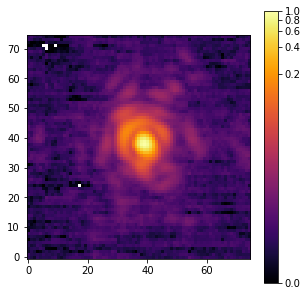

Select your target system to fit positions to


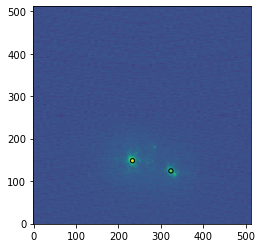

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 323.4704909394344 124.12764692496921  0.1022598637756013
232.99709920596828  148.1328831763225 0.09487514419351786
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 124  at FWHM 4.963072661706235
113.57832720132907 mas +/- 0.008552091760998753 mas
229.83464092175407 +/- 0.6777467951875735
Choose a reference star image to create a reference PSF from


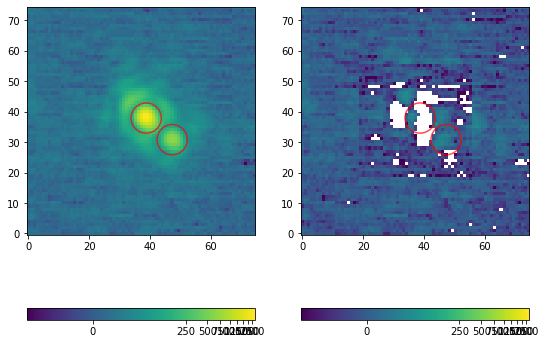

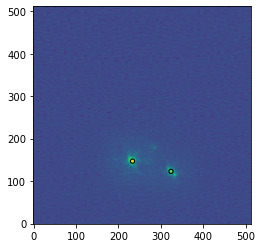

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.70603855535717 123.01222921908983  0.1141130888308222
233.07467322562442 147.05155606376687 0.09032207228947943
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 147  at FWHM 4.793501840841827


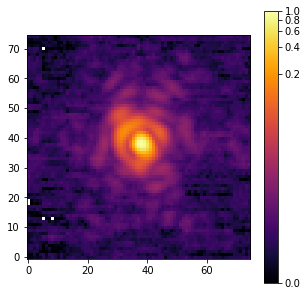

Select your target system to fit positions to


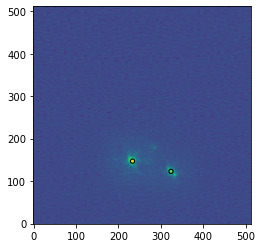

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
323.70603855535717 123.01222921908983  0.1141130888308222
233.07467322562442 147.05155606376687 0.09032207228947943
input the 0 indexed integer of your target from the table above: 0
target star is at  323 , 123  at FWHM 4.900270131431398
113.80032980826421 mas +/- 0.020722137955178715 mas
229.70102393634025 +/- 0.6411699849588217
Choose a reference star image to create a reference PSF from


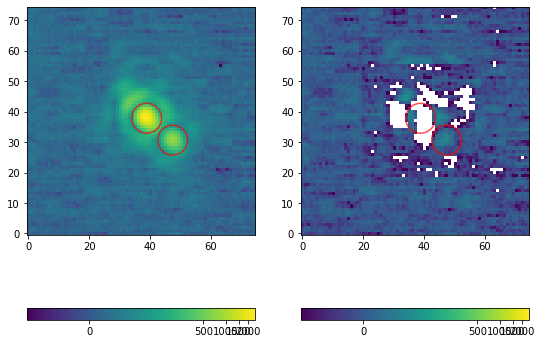

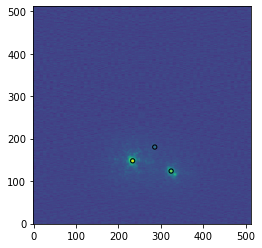

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0291575701494 123.71214382432255  0.03359987052491617
233.39726740241954 147.79246902952013 0.016059854812682316
285.41314187839595  180.2218881784925 0.008326519927912094
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 147  at FWHM 4.832196052682377


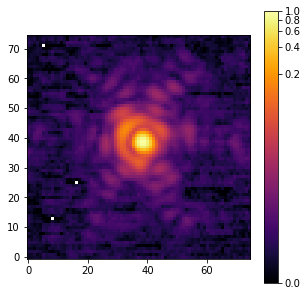

Select your target system to fit positions to


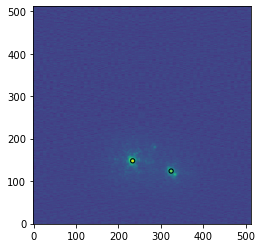

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0291575701494 123.71214382432255  0.03359987052491617
233.39726740241954 147.79246902952013 0.016059854812682316
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 123  at FWHM 4.870469693395364
113.96216544935567 mas +/- 0.050301184826576334 mas
229.65766144601568 +/- 0.5774763594395154
Choose a reference star image to create a reference PSF from


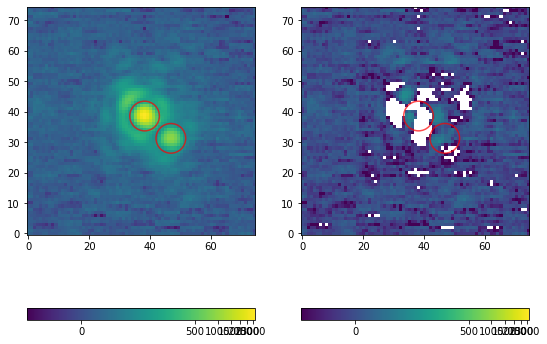

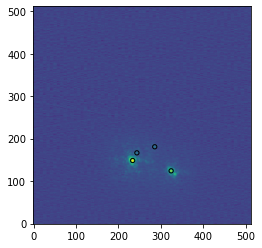

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0282995898423  124.2541586279307  0.05201545418931623
233.39079586739075 148.54156170198723 0.037326731366379734
243.33349345939166 166.59412838081948  0.15064125148189733
 285.3715380754732 180.85715636633412  0.04632719473775308
input the 0 indexed integer of your target from the table above: 1
target star is at  233 , 148  at FWHM 4.849084740268012


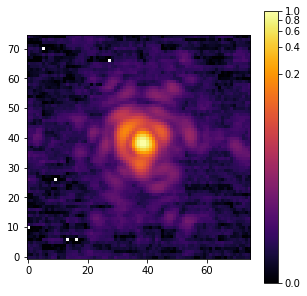

Select your target system to fit positions to


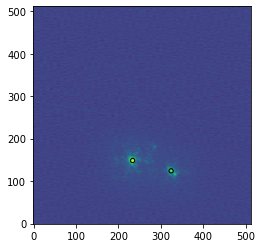

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 324.0282995898423  124.2541586279307  0.05201545418931623
233.39079586739075 148.54156170198723 0.037326731366379734
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 124  at FWHM 4.875551991042528
113.75101340744371 mas +/- 0.07067866068421876 mas
229.90755986535487 +/- 0.5727978397293327
Choose a reference star image to create a reference PSF from


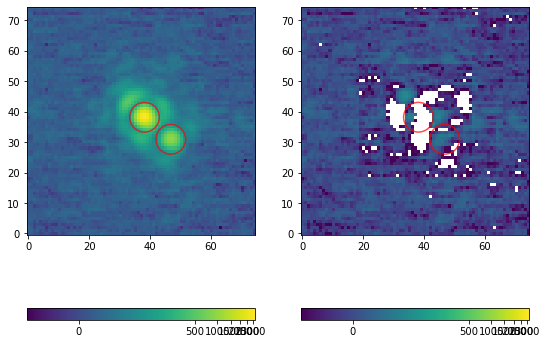

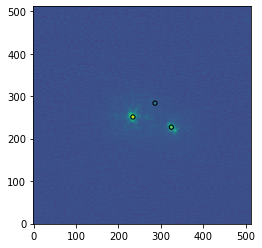

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
324.46408669492547 227.07348674499724 0.05986520892116804
234.00202533310915  251.1127630027827 0.05106357417550928
 285.9930007887647   283.599004516845 0.05425837073326343
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.811372934118339


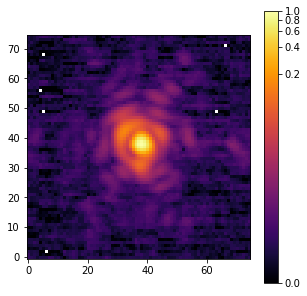

Select your target system to fit positions to


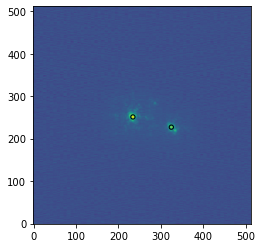

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
324.46408669492547 227.07348674499724 0.05986520892116804
234.00202533310915  251.1127630027827 0.05106357417550928
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 227  at FWHM 4.887200419236649
113.81628629713802 mas +/- 0.0953960211061825 mas
229.8729694459562 +/- 0.5580778187249962
Choose a reference star image to create a reference PSF from


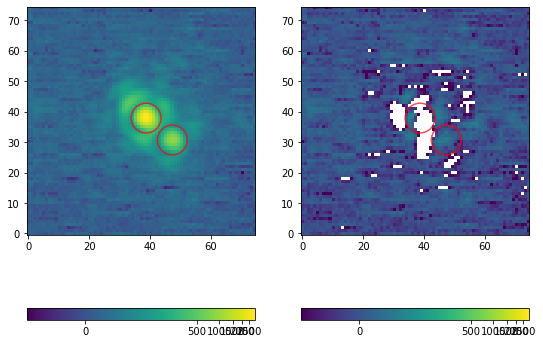

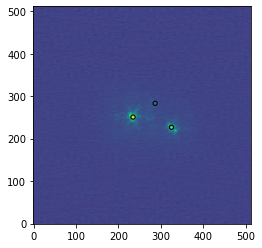

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.9031283018112 226.70973417812456  0.0655070829232822
234.27046507810078 250.79499415781507 0.02895909550274657
286.36878193407347 283.17987931630284 0.06882601292363054
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 250  at FWHM 4.848300271940303


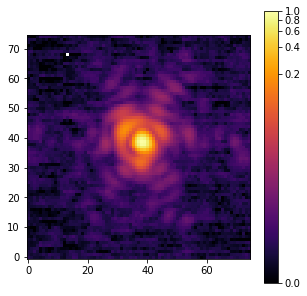

Select your target system to fit positions to


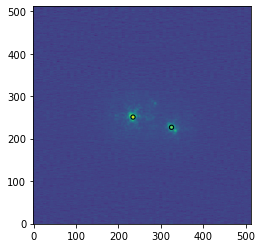

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 324.9031283018112 226.70973417812456  0.0655070829232822
234.27046507810078 250.79499415781507 0.02895909550274657
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 226  at FWHM 4.922056895725802
113.86025517111314 mas +/- 0.07635708135717005 mas
229.82038997700428 +/- 0.5578979812287628
Choose a reference star image to create a reference PSF from


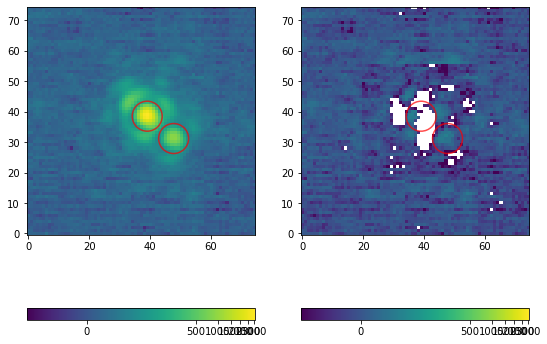

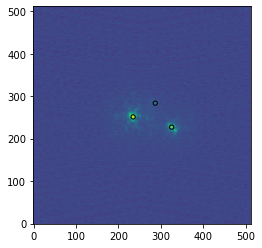

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
325.12592241250104 227.08133735825166 0.06238345804294377
 234.4765238989631  251.1778191599136 0.07598138448521898
  286.710933493424  283.6058789026391  0.0724817479702004
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.8652201578613585


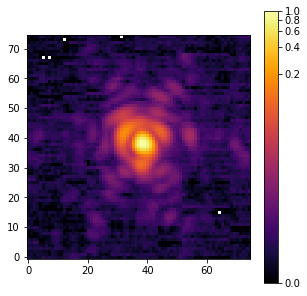

Select your target system to fit positions to


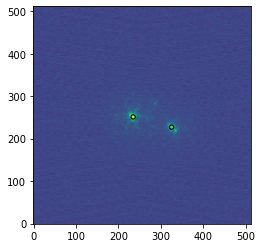

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
325.12592241250104 227.08133735825166 0.06238345804294377
 234.4765238989631  251.1778191599136 0.07598138448521898
input the 0 indexed integer of your target from the table above: 0
target star is at  325 , 227  at FWHM 4.823708161186403
113.99583627939919 mas +/- 0.07457437205568715 mas
229.89511721240905 +/- 0.564805724819422
Choose a reference star image to create a reference PSF from


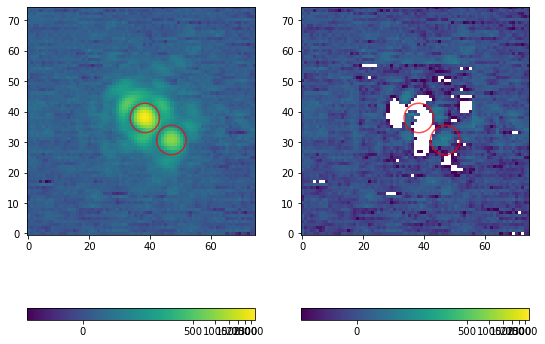

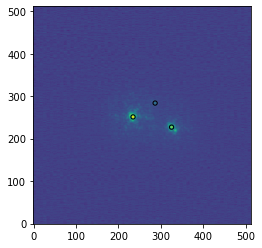

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
324.99288698298903 227.10707655863715 0.05431965437930581
 234.3161287150935 251.19171967080405 0.06154477984320327
 286.2967618361167  283.7520139803059 0.04039092341468262
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.8102834598192885


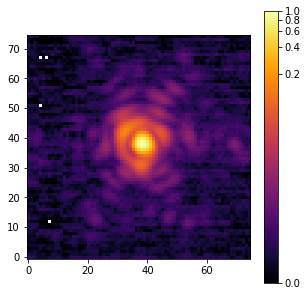

Select your target system to fit positions to


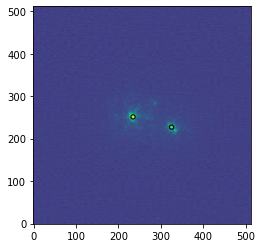

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
324.99288698298903 227.10707655863715 0.05431965437930581
 234.3161287150935 251.19171967080405 0.06154477984320327
input the 0 indexed integer of your target from the table above: 0
target star is at  324 , 227  at FWHM 4.793384783064994
113.88780342186296 mas +/- 0.1082544624156041 mas
229.84895611075754 +/- 0.5362004565486416
Choose a reference star image to create a reference PSF from


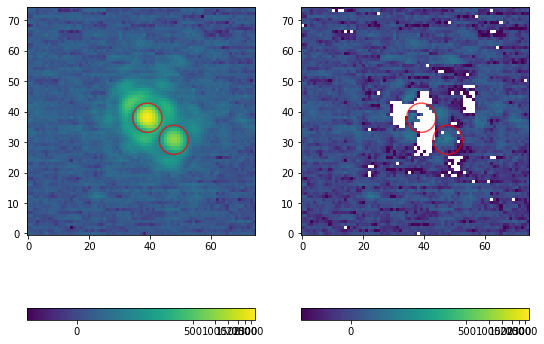

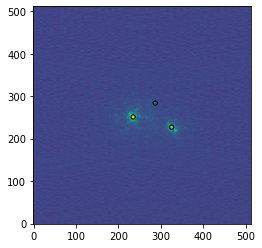

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
 325.0541956984768 227.06158138521863   0.0651502128141054
  234.413572656417 251.14422009681817  0.07283551924293528
286.45742009689525 283.74989527017976 0.011213311731549673
input the 0 indexed integer of your target from the table above: 1
target star is at  234 , 251  at FWHM 4.874499627426928


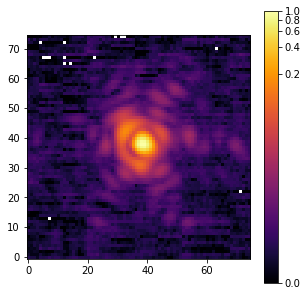

Select your target system to fit positions to


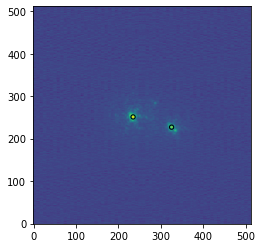

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
325.0541956984768 227.06158138521863  0.0651502128141054
 234.413572656417 251.14422009681817 0.07283551924293528
input the 0 indexed integer of your target from the table above: 0
target star is at  325 , 227  at FWHM 4.84461552983538
113.81411847810286 mas +/- 0.08162662414272173 mas
229.90449737726502 +/- 0.5490481516358159
Choose a reference star image to create a reference PSF from


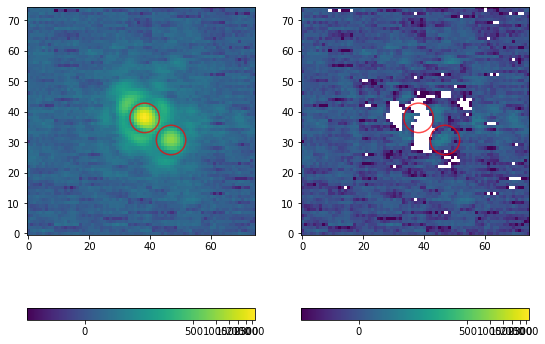

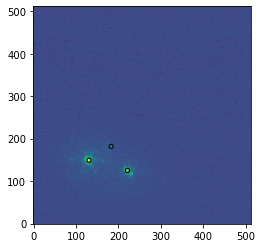

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.14902892164366  125.1986388601117  0.05995280891549452
 130.4603936420971  149.2932071967052  0.08015375280746197
182.69195541954358 181.78981292858913 0.022358356576095455
input the 0 indexed integer of your target from the table above: 1
target star is at  130 , 149  at FWHM 4.9038204791448265


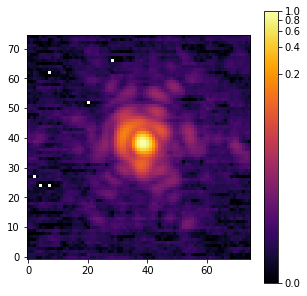

Select your target system to fit positions to


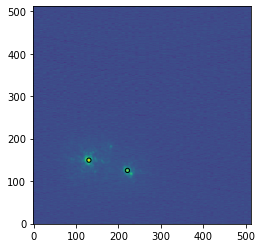

    xcentroid          ycentroid          roundness     
------------------ ----------------- -------------------
221.14902892164366 125.1986388601117 0.05995280891549452
 130.4603936420971 149.2932071967052 0.08015375280746197
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 125  at FWHM 4.885904604154973
114.12078533634391 mas +/- 0.120021576613784 mas
229.82988494035635 +/- 0.5209850045961275
Choose a reference star image to create a reference PSF from


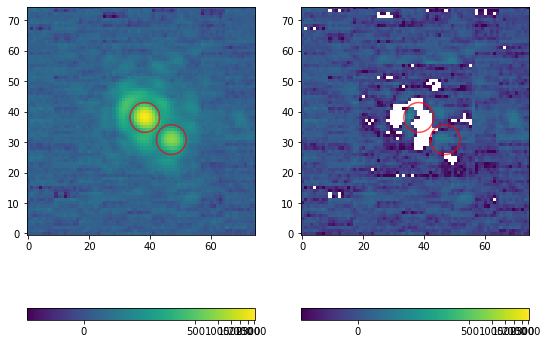

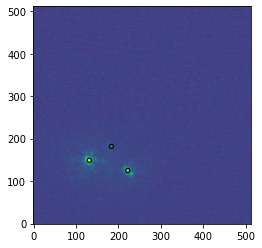

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.90315761282224  125.0745440157312 0.051111656944477404
131.25065150631912 149.17444066632757   0.0523109578605587
 183.3342146883221 181.72452731294248   0.0486731253242434
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 149  at FWHM 4.839619969335018


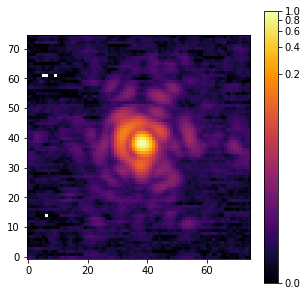

Select your target system to fit positions to


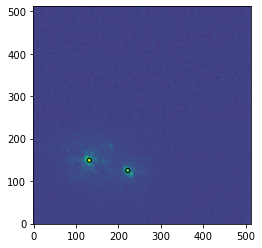

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.90315761282224  125.0745440157312 0.051111656944477404
131.25065150631912 149.17444066632757   0.0523109578605587
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 125  at FWHM 4.829078740312525
114.04326597732445 mas +/- 0.10897876520319784 mas
229.81679155475763 +/- 0.5147459586926573
Choose a reference star image to create a reference PSF from


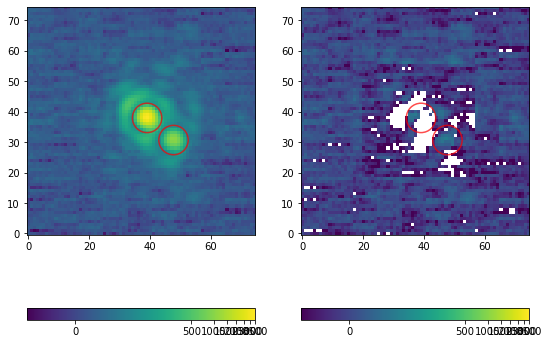

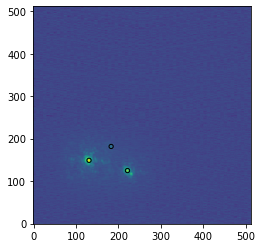

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.22362390997412 124.89265093797985  0.03956076992320169
 130.7139142236671 148.91621508217335 0.059947018750812285
 182.7016594994726  181.5954585626428  0.08756278315995707
input the 0 indexed integer of your target from the table above: 1
target star is at  130 , 148  at FWHM 4.782994823061415


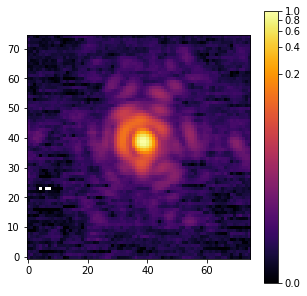

Select your target system to fit positions to


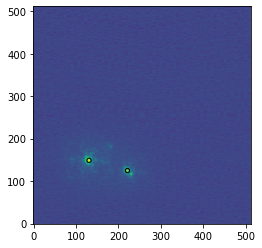

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.22362390997412 124.89265093797985  0.03956076992320169
 130.7139142236671 148.91621508217335 0.059947018750812285
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.826874933703067
114.14301586688939 mas +/- 0.11359883220038253 mas
229.82287745308545 +/- 0.5254735281819478
Choose a reference star image to create a reference PSF from


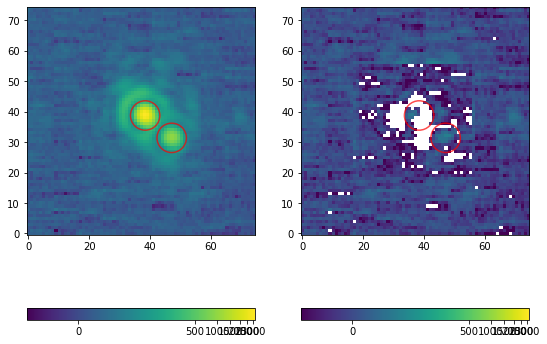

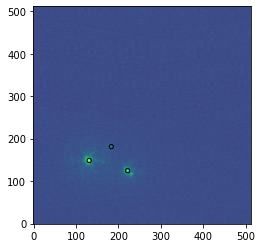

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.69527951122188 124.64947431203444  0.07719679449392768
131.00345073164013 148.73400544704498  0.03318391265068995
 183.0800463520838 181.11721794078926 0.039137440489846076
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 148  at FWHM 4.7817317469271075


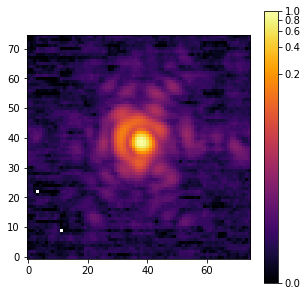

Select your target system to fit positions to


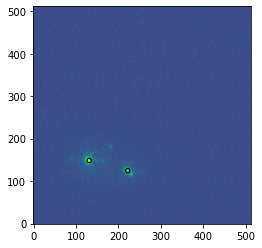

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.69527951122188 124.64947431203444 0.07719679449392768
131.00345073164013 148.73400544704498 0.03318391265068995
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.855687314191158
114.0923537772806 mas +/- 0.10736216254013026 mas
229.90160443039628 +/- 0.5266789185947687
Choose a reference star image to create a reference PSF from


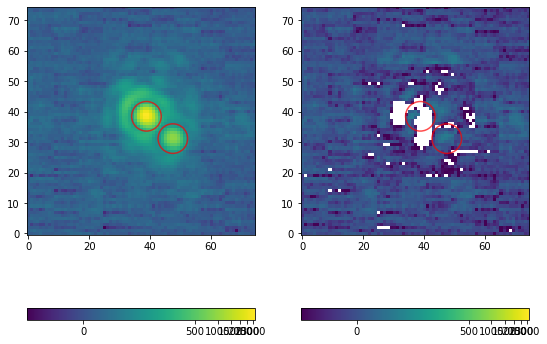

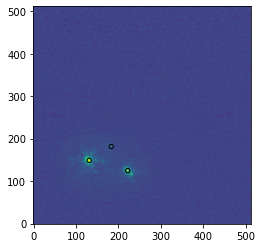

    xcentroid          ycentroid           roundness      
------------------ ------------------ --------------------
221.74734367845815 124.83281302918333  0.07980838911653065
 131.0642104889551  148.9391744672256  0.04434260173021134
183.09871057796562 181.36253204689078 0.051265967586975214
input the 0 indexed integer of your target from the table above: 1
target star is at  131 , 148  at FWHM 4.847536834866304


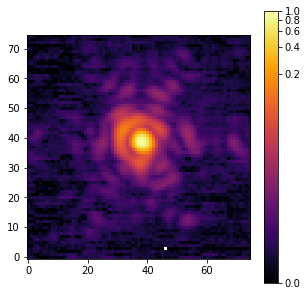

Select your target system to fit positions to


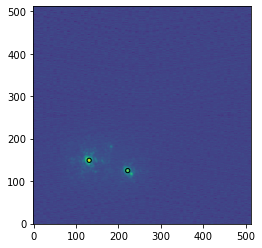

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
221.74734367845815 124.83281302918333 0.07980838911653065
 131.0642104889551  148.9391744672256 0.04434260173021134
input the 0 indexed integer of your target from the table above: 0
target star is at  221 , 124  at FWHM 4.893264870405261
114.04218443856351 mas +/- 0.13022340761147427 mas
229.9314393240344 +/- 0.4978525456788816


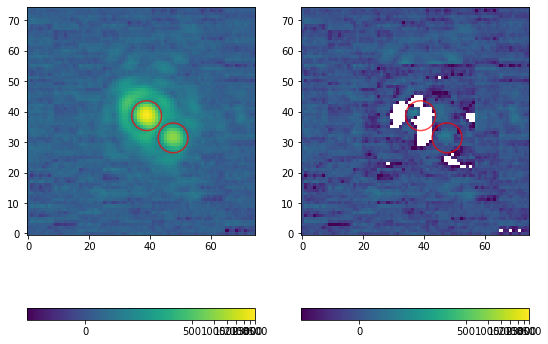

In [42]:
data_frames = []
for dataset in NIRC2_datasets[15:]:
    data = []
    for image in dataset:
        phot_results = starLocate(image, 200, 5, 5, stampsize=75, epsfstamp=75, roundness=0.5, iterations=2, crit_sep=10, setfwhm=False)
        data.append(phot_results)
    data2 = np.asarray(data)
    data_frames.append(pd.DataFrame(data=data2, columns=['sep','seperr','PA','PAerr']))

In [43]:
data_frames

[           sep    seperr          PA     PAerr
 0   113.910580  0.029500  229.861794  0.731116
 1   113.768259  0.032427  229.913561  0.724907
 2   113.716835  0.034419  229.797645  0.644823
 3   113.806463  0.027774  229.927268  0.642367
 4   114.045580  0.062042  229.881360  0.581655
 5   113.850750  0.085162  229.951030  0.567803
 6   113.700814  0.104019  229.994066  0.532914
 7   113.908957  0.093621  229.908165  0.557837
 8   113.909710  0.096553  229.987035  0.547452
 9   113.907349  0.053578  229.990669  0.588457
 10  113.337165  0.033719  229.895157  0.635333
 11  113.578327  0.008552  229.834641  0.677747
 12  113.800330  0.020722  229.701024  0.641170
 13  113.962165  0.050301  229.657661  0.577476
 14  113.751013  0.070679  229.907560  0.572798
 15  113.816286  0.095396  229.872969  0.558078
 16  113.860255  0.076357  229.820390  0.557898
 17  113.995836  0.074574  229.895117  0.564806
 18  113.887803  0.108254  229.848956  0.536200
 19  113.814118  0.081627  229.904497  0

In [44]:
data_frames[0].to_clipboard()

In [3]:
results = pd.read_csv('IRAFStarfind_B2-B3.csv', nrows=16)

In [4]:
results.columns

Index(['Date', 'Filter 1', 'Filter 2', 'Name', 'Sep B2-B3', 'Sep Error',
       'Good sep', 'Sep goodness', 'Conserv sep Error', 'Avg PA B2-B3',
       'Avg PA Error', 'Good Pa', 'PA Goodness', 'Conserv PA Error',
       'Num imgs used', 'True Sep B2-B3', 'True Sep Error', 'True PA',
       'True PA err', 'do not delete, vestigial (had to copy from pdf)'],
      dtype='object')

In [5]:
results = results.drop([5,7,10])

In [7]:
results['datetime'] = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in results['Date']]
results['Epoch'] = [(x-results.datetime[0]).days for x in results.datetime]

(-500.0, 6700.0)

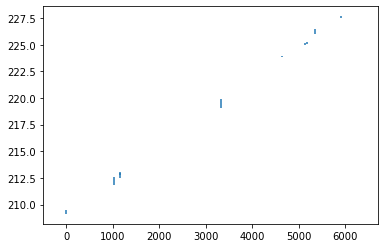

In [8]:
plt.errorbar(results['Epoch'], results['True PA'], yerr=results['True PA err'], ls='none')
plt.xlim(-500, 6700)

(-500.0, 6700.0)

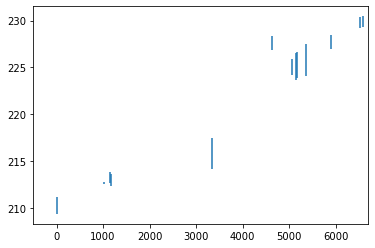

In [9]:
plt.errorbar(results['Epoch'], results['Avg PA B2-B3'], yerr=results['Avg PA Error'], ls='none')
plt.xlim(-500, 6700)

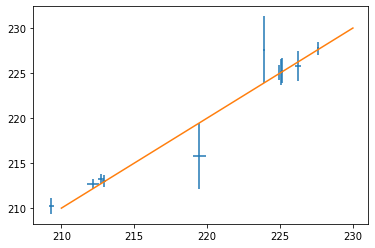

In [11]:
plt.errorbar(x=results['True PA'], y=results['Avg PA B2-B3'], xerr=results['True PA err'], yerr=results['Conserv PA Error'], ls='none')
plt.plot([210,230],[210,230])